In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [3]:
# Data from the problem set For AHS 1 to 12
improve_rate = np.array([0, 0.00032, 0.001134, 0.00311, 0.006721, 0.010747, 0.014862, 0.024625, 0.033571, 0.040201, 0.030801, 0.032320, 0.00032, 0.001134, 0.00311, 0.006721, 0.010747, 0.014862, 0.024625, 0.033571, 0.040201, 0.030801, 0.03232])
deteriorate_rate = np.array([0.001013, 0.000961, 0.001473, 0.003199, 0.005537, 0.008135, 0.010858, 0.02387, 0.0313, 0.037877, 0.031978, 0])
death_rate = np.array([0.000123, 0.000172, 0.000245, 0.000319, 0.000417, 0.000564, 0.00076, 0.001029, 0.001372, 0.001862, 0.00245, 0.003553])
transplant_prob = np.array([0.0001, 0.0002, 0.0002, 0.0003, 0.0004, 0.0006, 0.0008, 0.0010, 0.0014, 0.0019, 0.0024, 0.0035])
post_trans_days_all=np.array([3747,3623.25,3502.5,3380,3259.25,3137.5,3014,2898.25,2776.5,2661.25,2537,2417.25])

In [4]:
#rate to Probabilities
prob_improv_rate=1-np.exp(-improve_rate)
prob_det_rate=1-np.exp(-deteriorate_rate)
prob_death_rate=1-np.exp(-death_rate)

In [5]:
#Probability Matrix 
def probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob):
    P=np.zeros((14,14)) #probability matrix initialization
    P[13][13]=1
    P[12][12]=1
    for i in range(0,12): 
            P[i][i+1]=prob_det_rate[i]
            P[i][12]=prob_death_rate[i]
            P[i][i-1]=prob_improv_rate[i]
            if i+1>=threshold_policy:
                P[i][13]=transplant_prob[i]
                
            if i!=11:
                P[i][i]=1-(P[i][i+1]+P[i][12]+P[i][i-1]+P[i][13])
            else:
                 P[i][i]=1-(P[i][12]+P[i][i-1]+P[i][13])
    return P

In [6]:
#likelihood and pre-transplant expected days calculation
def transient_analysis(P):
    Q=P[0:12,0:12]
    R=np.zeros((12,13))
    for i in range (0,12):
        R[i][0]=P[i][12]
        R[i][i+1]=P[i][13]
    I=np.identity(12)

    inv=np.linalg.inv(I-Q)
    ones = np.ones((12,1))
    pre_trans_days=np.dot(inv,ones) #partb
    likelihood=np.dot(inv,R) #partc
    return pre_trans_days, likelihood

In [7]:
def total_expectation(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all):

    P=probability_matrix(threshold_policy,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
    pre_trans_days, likelihood=transient_analysis(P)
    
    #set up post_trans_days array
    #post_trans_days_threshold_range=post_trans_days_all[threshold_policy-1:12]
    #zeros=np.zeros(threshold_policy-1)
    #post_trans_days_threshold=np.append(zeros,post_trans_days_threshold_range)
    #post_trans_days_threshold=np.array([post_trans_days_threshold])

    #total expectation 
    Total_expec=np.dot(np.array(likelihood[:,1:13]),post_trans_days_all).reshape((12,1))+pre_trans_days #PART D
    #print(pre_trans_days.shape)
    return Total_expec

In [8]:
#given a threshold policy of 5 or up
P=probability_matrix(5,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob)
pre_trans_days, likelihood=transient_analysis(P)
x=total_expectation(5,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all)

In [14]:
#given for all thresehold_policy Part e
x=[]
y=[total_expectation(i,prob_improv_rate,prob_det_rate,prob_death_rate,transplant_prob,post_trans_days_all) for i in range(1,14)]
x=np.stack(y,axis=0)
x=x.reshape((13,12))
x_sum=np.sum(x,axis=1)


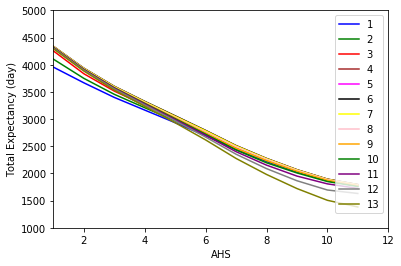

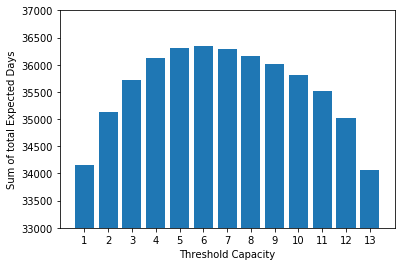

In [23]:
#plot Expectancy vs. AHS with different threshold capacity
plt.figure()
label_list=[]
color_list=['blue','green','red','brown','magenta','black','yellow','pink','orange','green','purple','grey','olive']

for i in range(0,13):
    label_list.append(i+1)
    plt.plot(x[i,:],c=color_list[i])
    plt.legend(label_list)

plt.ylim(1000, 5000)
plt.xlim(1,12,1)
plt.ylabel('Total Expectancy (day)') 
plt.xlabel('AHS')
plt.show()

plt.figure()
label_list=list(map(str, label_list))
plt.bar(label_list,x_sum)
plt.ylim(33000, 37000)
plt.ylabel('Sum of total Expected Days')
plt.xlabel('Threshold Capacity')
plt.show()